In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('df_final.csv')

#### Let's have a loot at our data 
- 31 columns
- calculate job description length
- company name need to be cleaned
- let's see also the distribution of our data
- 15 objects to visualize


In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,sql_yn,python_yn,r_yn,spark_yn,aws_yn,excel_yn,tableau_yn,powerbi_yn,kafka_yn,snowflake_yn
0,Finance Data Analyst - Growth and Forecasting,£45K - £50K (Glassdoor est.),"What you'll be doing:\nAt TransferWise, we've ...",4.3,TransferWise\n4.3,"London, England",1001 to 5000 Employees,2011,Company - Private,Financial Transaction Processing,...,1,1,0,0,0,1,0,0,0,0
1,Data & Insights Analyst,£25K - £53K (Glassdoor est.),Job Title: Data & Insights Analyst\n\nLocation...,4.5,Liberis\n4.5,"London, England",51 to 200 Employees,2007,Company - Private,Lending,...,1,1,1,0,0,1,1,1,0,0
2,Asset Management Data Analyst,£35K - £58K (Glassdoor est.),If you consider yourself to be a data expert w...,4.3,Southern Housing Group\n4.3,"London, England",1001 to 5000 Employees,1901,Nonprofit Organization,Construction,...,0,0,0,0,0,1,0,0,0,0
3,Data Analyst,£50K - £60K (Glassdoor est.),Streetbees is building the world’s first platf...,4.0,Streetbees\n4.0,"London, England",51 to 200 Employees,2015,Company - Private,Research & Development,...,1,1,0,0,0,1,0,0,0,0
4,Data Analyst,£59K - £61K (Glassdoor est.),Kick-start your career in the online gaming wo...,3.6,Betway Group\n3.6,"London, England",501 to 1000 Employees,2006,Company - Private,Advertising & Marketing,...,1,0,0,0,0,1,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          333 non-null    object 
 1   Salary Estimate    333 non-null    object 
 2   Job Description    333 non-null    object 
 3   Rating             333 non-null    float64
 4   Company Name       333 non-null    object 
 5   Location           333 non-null    object 
 6   Size               333 non-null    object 
 7   Founded            333 non-null    int64  
 8   Type of ownership  333 non-null    object 
 9   Industry           333 non-null    object 
 10  Sector             333 non-null    object 
 11  Revenue            333 non-null    object 
 12  job_title_short    333 non-null    object 
 13  seniority          333 non-null    object 
 14  business_domain    333 non-null    object 
 15  min_salary         333 non-null    int64  
 16  max_salary         333 non

In [5]:
# Job descripton length
df['description_len'] = df['Job Description'].apply(lambda x: len(x))

In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_title_short', 'seniority',
       'business_domain', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'city', 'company_age', 'sql_yn', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn', 'powerbi_yn',
       'kafka_yn', 'snowflake_yn', 'description_len'],
      dtype='object')

In [7]:
#Cleaning company name
df['company_name'] = df['company_name'].apply(lambda x: x.replace('\n', ''))

In [8]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,company_age,sql_yn,python_yn,r_yn,spark_yn,aws_yn,excel_yn,tableau_yn,powerbi_yn,kafka_yn,snowflake_yn,description_len
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.189189,1360.114114,30.480480,40.588589,35.534535,29.078078,0.630631,0.381381,0.102102,0.015015,0.051051,0.633634,0.279279,0.069069,0.009009,0.039039,3743.603604
std,1.784556,919.701991,8.946818,11.058802,9.430525,48.577598,0.483360,0.486457,0.303238,0.121795,0.220433,0.482536,0.449320,0.253953,0.094629,0.193979,1871.685465
min,-1.000000,-1.000000,18.000000,20.000000,20.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000
25%,3.300000,-1.000000,23.000000,34.000000,31.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2267.000000
50%,3.800000,1985.000000,29.000000,43.000000,34.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3838.000000
75%,4.100000,2006.000000,35.000000,45.000000,40.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4923.000000
max,5.000000,2020.000000,65.000000,75.000000,67.000000,326.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11329.000000


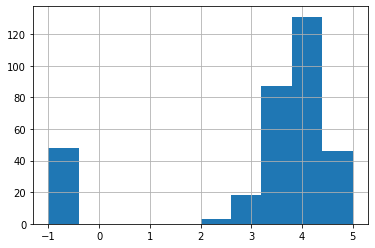

In [9]:
#Distribution of our data

#Rating
df.Rating.hist()

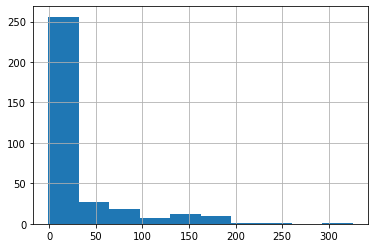

In [10]:
#Company age
df.company_age.hist()

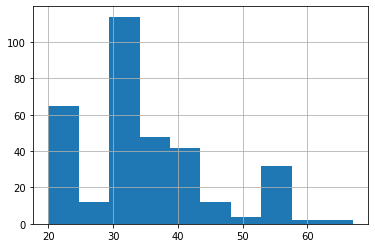

In [11]:
#Average salary
df.avg_salary.hist()

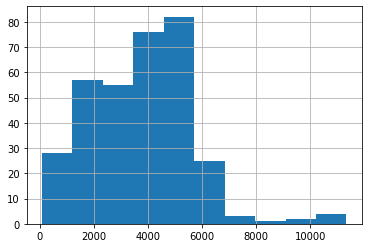

In [12]:
#Description length
df.description_len.hist()

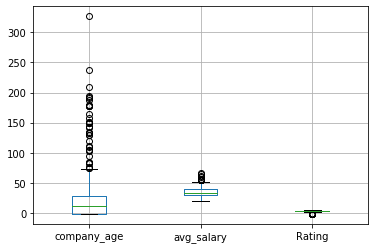

In [13]:
df.boxplot(column=['company_age', 'avg_salary', 'Rating'])

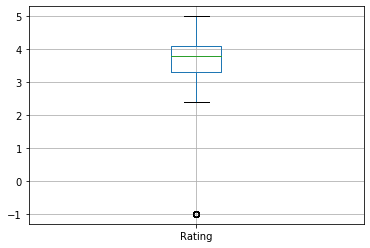

In [14]:
df.boxplot(column=['Rating'])

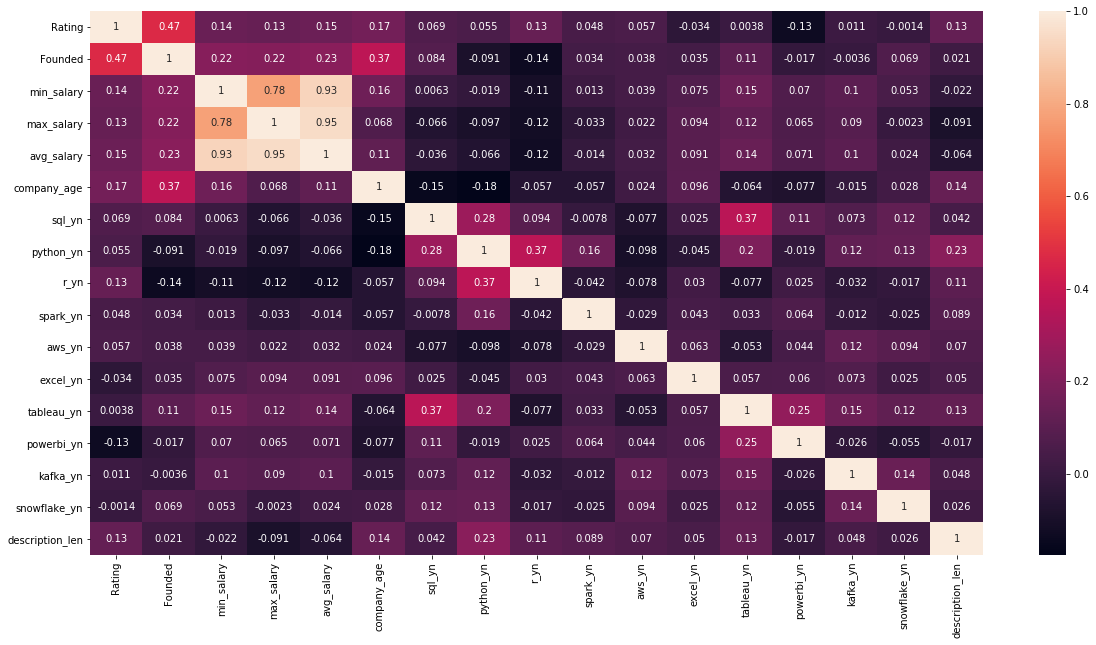

In [15]:
#Let's see correlation between values
df_corr = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True)

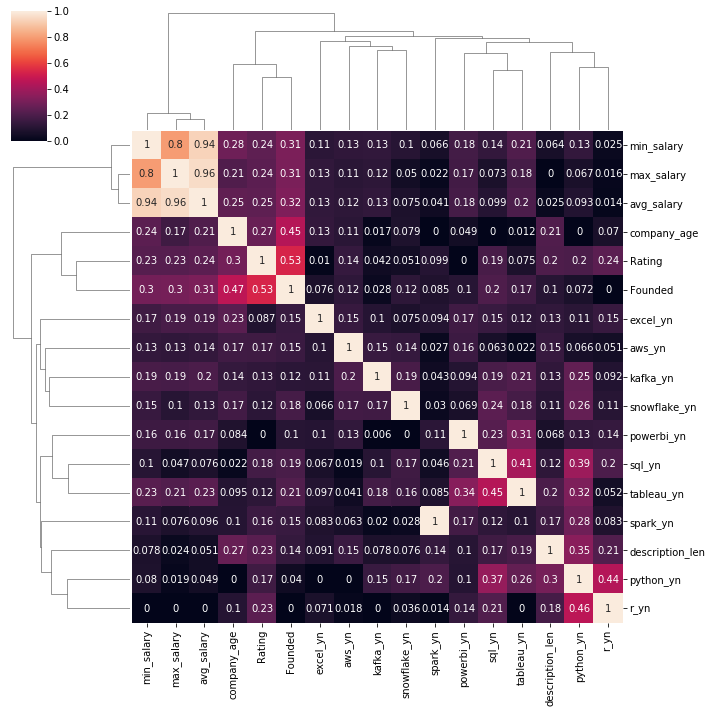

In [16]:
sns.clustermap(df_corr, annot=True, standard_scale=1)

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'job_title_short', 'seniority',
       'business_domain', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'city', 'company_age', 'sql_yn', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn', 'powerbi_yn',
       'kafka_yn', 'snowflake_yn', 'description_len'],
      dtype='object')

In [18]:
df_categorical = df[['Size', 'Type of ownership', 'company_name',
       'Industry', 'Sector', 'Revenue', 'job_title_short', 'seniority',
       'business_domain', 'city']]

Graph for Size: total = 9


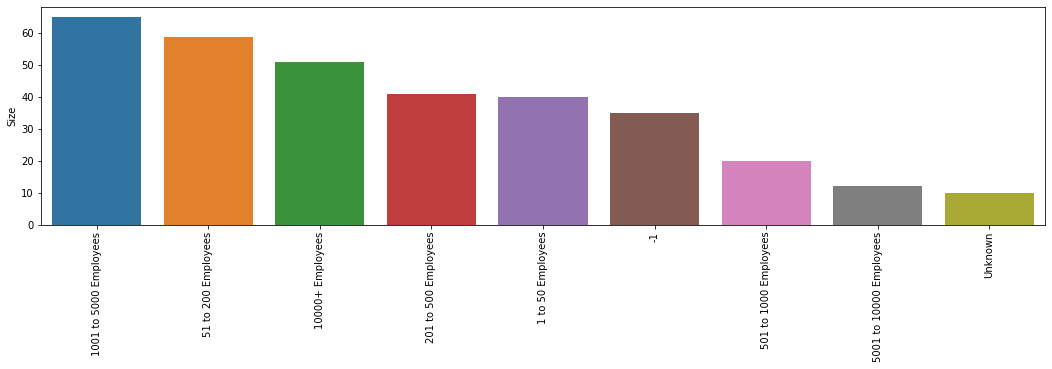

Graph for Type of ownership: total = 10


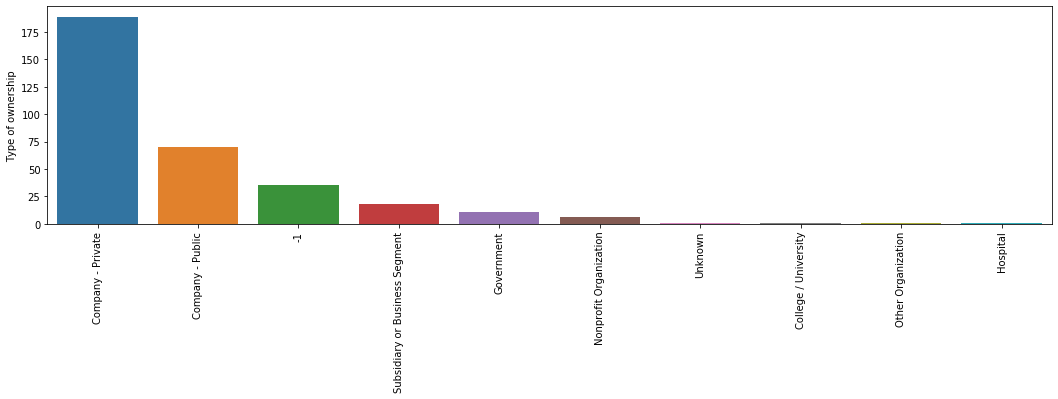

Graph for company_name: total = 232


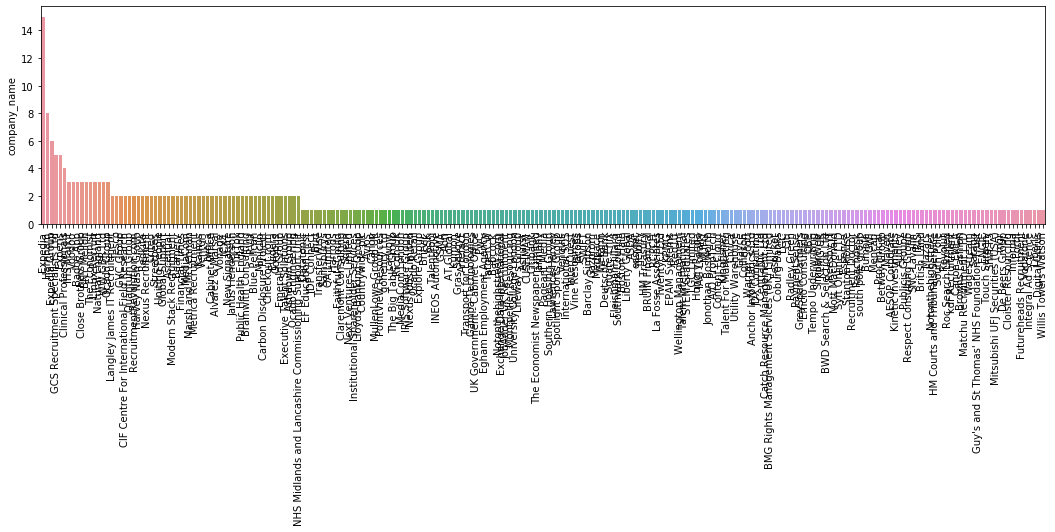

Graph for Industry: total = 55


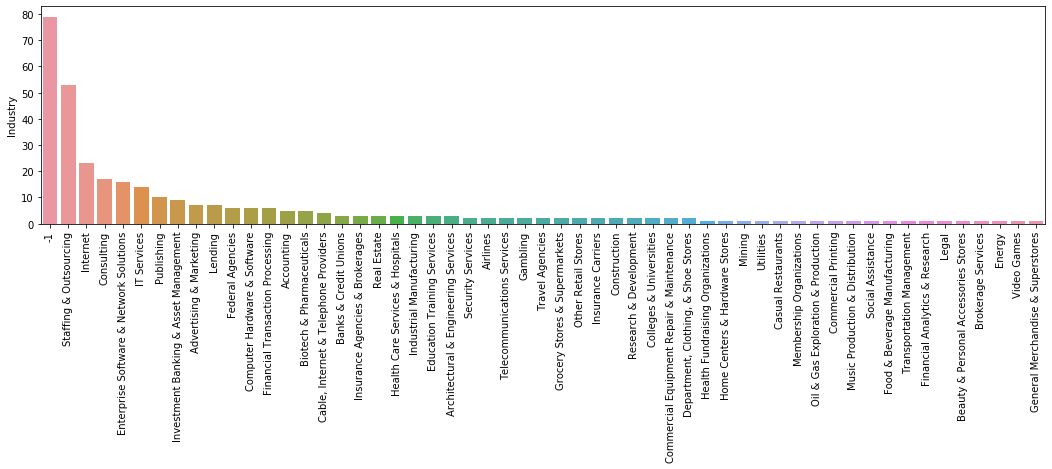

Graph for Sector: total = 23


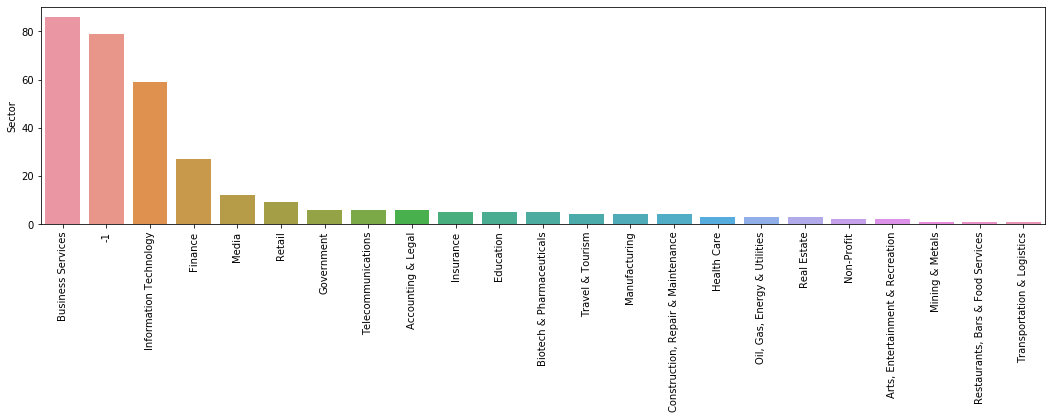

Graph for Revenue: total = 14


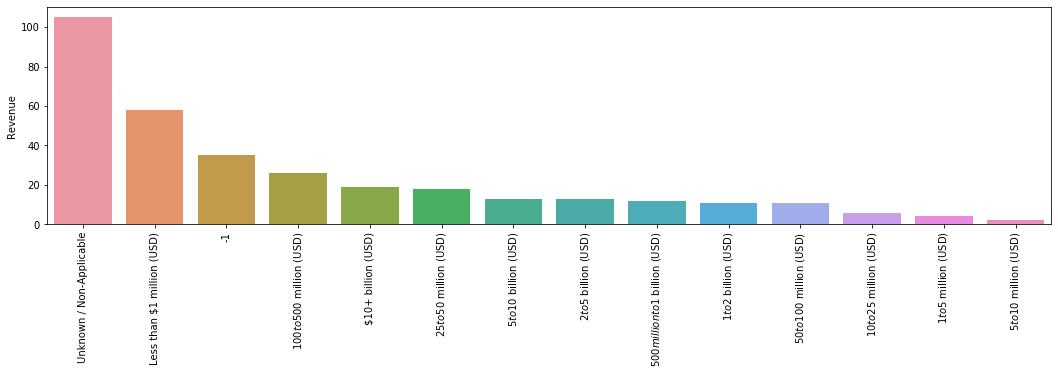

Graph for job_title_short: total = 3


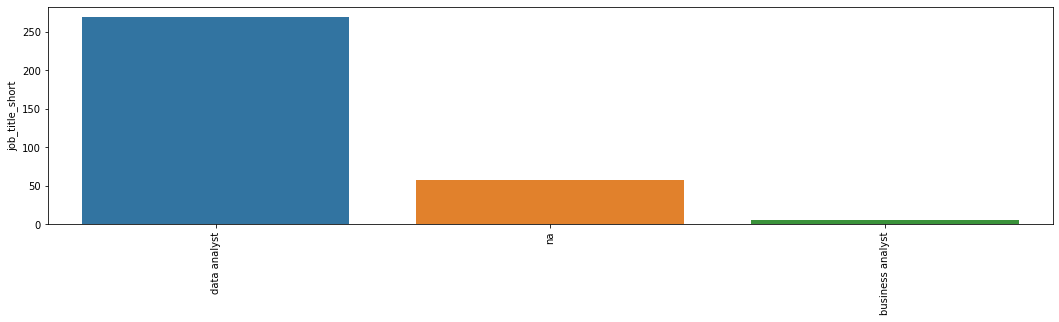

Graph for seniority: total = 5


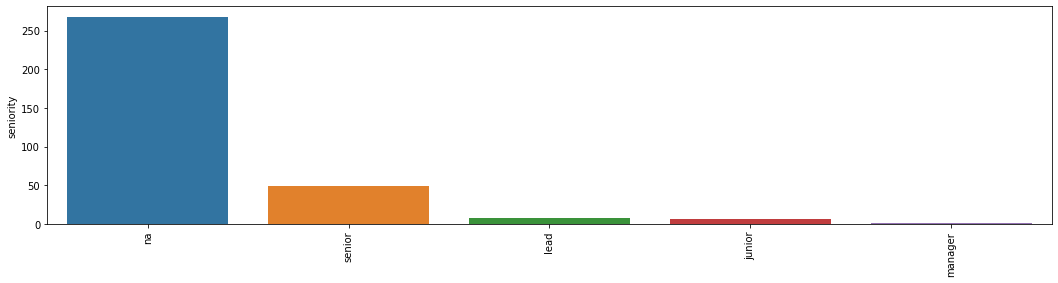

Graph for business_domain: total = 9


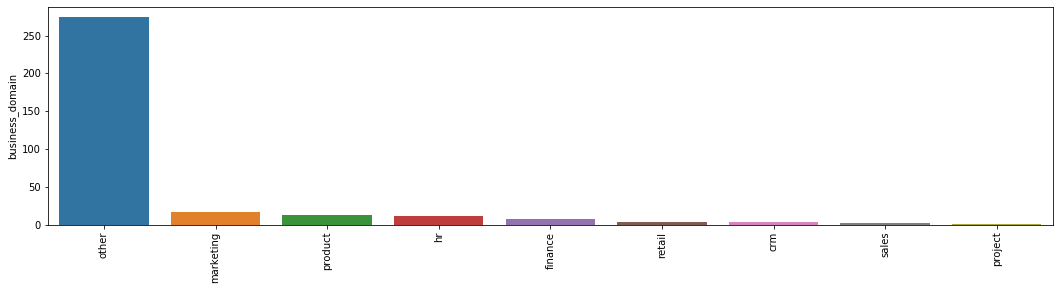

Graph for city: total = 24


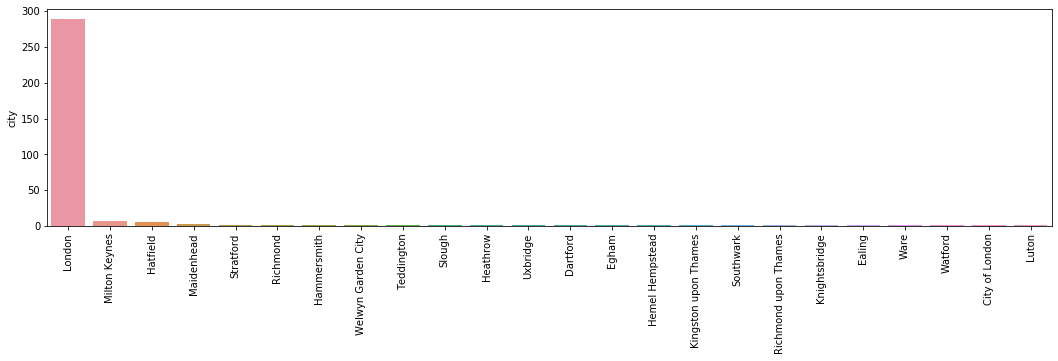

In [19]:
#let's see number of postings for each categorical value

for i in df_categorical.columns:
    categorical_num = df_categorical[i].value_counts()
    print("Graph for %s: total = %d" % (i,len(categorical_num)))
    plt.figure(figsize=(18,4))
    chart = sns.barplot(x=categorical_num.index, y=categorical_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for company_name: total = 20


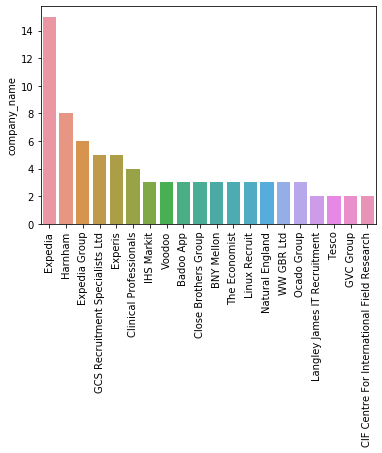

Graph for Industry: total = 20


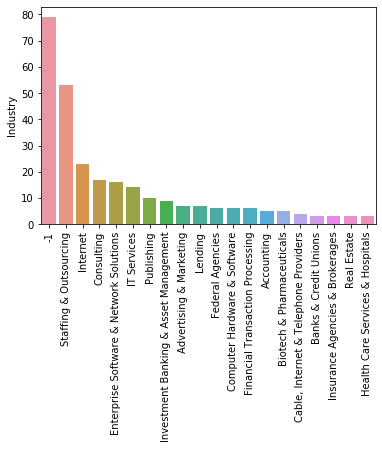

Graph for Sector: total = 20


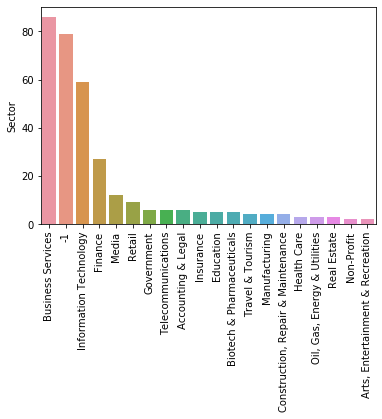

Graph for city: total = 20


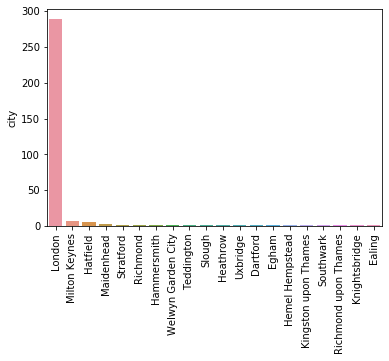

In [20]:
#let's focus on TOP 20 

for i in df_categorical[['company_name', 'Industry', 'Sector', 'city']].columns:
    categorical_num = df_categorical[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i,len(categorical_num)))
    chart = sns.barplot(x=categorical_num.index, y=categorical_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

- Expedia and Harnham have more than 30 (10%) open positions.
- Business Services , IT and Finance hiring a lot (> 50% of all open positions)
- 87% of all openings are in London

In [21]:
#let's see average salary per all dimensions

pd.pivot_table(df,index=['job_title_short', 'seniority'], values = 'avg_salary')

avg_salary
job_title_short  seniority            
business analyst na          37.166667
data analyst     junior      27.800000
                 lead        31.562500
                 manager     55.000000
                 na          37.007009
                 senior      31.804878
na               junior      24.000000
                 na          33.729167
                 senior      34.125000

In [22]:
pd.pivot_table(df, index=['city', 'job_title_short'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
city,job_title_short,
Egham,data analyst,55.000000
Stratford,data analyst,47.500000
Milton Keynes,na,40.000000
Richmond,data analyst,39.250000
Dartford,na,37.500000
Ware,data analyst,37.500000
Southwark,data analyst,37.500000
London,business analyst,37.166667
Ealing,data analyst,37.000000


In [23]:
pd.pivot_table(df, index=['city', 'job_title_short'], values = 'avg_salary', aggfunc='count').sort_values('avg_salary', ascending = False)

avg_salary
city                 job_title_short             
London               data analyst             233
                     na                        50
                     business analyst           6
Milton Keynes        data analyst               6
Hatfield             data analyst               6
Maidenhead           data analyst               3
Welwyn Garden City   na                         2
Slough               data analyst               2
Stratford            data analyst               2
Teddington           na                         2
Uxbridge             data analyst               2
Heathrow             data analyst               2
Hammersmith          data analyst               2
Richmond             data analyst               2
Richmond upon Thames data analyst               1
Southwark            data analyst               1
Ware                 data analyst               1
Watford              data analyst               1
City of London       data analyst               1
Milton Keynes        na                         1
Dartford             na                         1
Knightsbridge        na                         1
Kingston upon Thames data analyst               1
Hemel Hempstead      data analyst               1
Egham                data analyst               1
Ealing               data analyst               1
Luton                na                         1

In [24]:
df_pivots = df[['Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_title_short', 'seniority', 'business_domain', 'company_name', 'city', 'company_age', 'sql_yn', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'tableau_yn', 'powerbi_yn', 'kafka_yn', 'snowflake_yn', 'description_len', 'avg_salary']]

In [25]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.4     55.000000
 3.4     42.000000
 4.6     40.250000
 3.8     39.846154
 4.0     39.400000
 3.6     38.538462
 3.5     38.521739
 4.8     38.166667
 4.7     37.500000
 5.0     36.863636
 2.9     36.833333
 4.5     36.450000
 2.5     35.750000
 4.3     35.722222
 4.1     35.357143
 3.9     35.109375
 4.4     34.950000
 3.2     34.791667
 3.0     34.590909
 3.3     34.500000
 4.9     33.500000
 3.1     33.000000
 4.2     32.038462
-1.0     32.000000
 3.7     31.518519
 2.7     31.500000
 2.8     31.250000
Size
                         avg_salary
Size                               
501 to 1000 Employees     38.650000
10000+ Employees          38.401961
1001 to 5000 Employees    36.461538
51 to 200 Employees       36.449153
1 to 50 Employees         34.950000
Unknown                   33.900000
201 to 500 Employees      32.780488
5001 to 10000 Employees   32.666667
-1                        31.657143
Type of ownership
                       

0            35.351613
kafka_yn
          avg_salary
kafka_yn            
1          45.500000
0          35.443939
snowflake_yn
              avg_salary
snowflake_yn            
1              36.653846
0              35.489063
description_len
                 avg_salary
description_len            
3263                   67.0
5154                   65.0
5886                   62.0
4452                   60.0
1827                   57.0
...                     ...
4959                   24.0
4684                   24.0
4676                   24.0
3349                   24.0
1313                   21.0

[284 rows x 1 columns]
avg_salary


ValueError: Grouper for 'avg_salary' not 1-dimensional

In [26]:
pd.pivot_table(df_pivots, index='Revenue', columns='sql_yn', values='avg_salary', aggfunc='count')

sql_yn,0,1
Revenue,,
$1 to $2 billion (USD),5,6
$1 to $5 million (USD),2,2
$10 to $25 million (USD),1,5
$10+ billion (USD),14,5
$100 to $500 million (USD),11,15
$2 to $5 billion (USD),6,7
$25 to $50 million (USD),1,17
$5 to $10 billion (USD),6,7
$5 to $10 million (USD),1,1
